# 광고효과측정데이터셋으로 주요 지표 구하고 액션 플랜 작성

## 1.데이터 확인 및 전처리

In [3]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_data.csv')

In [11]:
df.shape

(100000, 21)

In [12]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   광고_채널      100000 non-null  object 
 1   광고_형식      100000 non-null  object 
 2   광고_노출_횟수   100000 non-null  int64  
 3   광고_클릭_횟수   100000 non-null  int64  
 4   광고_지출액     100000 non-null  float64
 5   광고_타겟팅     100000 non-null  object 
 6   광고_시작일     100000 non-null  object 
 7   광고_종료일     100000 non-null  object 
 8   사용자_ID     100000 non-null  object 
 9   성별         100000 non-null  object 
 10  연령         100000 non-null  int64  
 11  거주_지역      100000 non-null  object 
 12  직업         100000 non-null  object 
 13  관심사        100000 non-null  object 
 14  구매_이력      100000 non-null  int64  
 15  웹사이트_방문_수  100000 non-null  int64  
 16  페이지뷰       100000 non-null  int64  
 17  전환율        100000 non-null  float64
 18  매출액        100000 non-null  float64
 19  광고_회상률     100000 non-nu

None

,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,...,거주_지역,직업,관심사,구매_이력,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,...,안양,직장인,요리,3,301,1204,0.007,126.99,0.212,-0.128
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,...,대전,프리랜서,패션,3,509,1527,0.022,2030.33,0.187,-0.234
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,...,천안,프리랜서,기술,4,547,547,0.020,963.91,0.249,-0.040
3,SNS,배너,9988,326,570.79,"40대, 남성, 건강",2024-11-05,2024-11-21,ff995b59-0554-4db2-9f7f-b1e4a50002d4,여성,...,춘천,공무원,여행,5,331,1324,0.027,1727.08,0.153,-0.180
4,SNS,이미지,10113,277,772.68,"50대, 남성, 게임",2024-03-03,2024-03-17,6de271b7-ddc0-4c82-9951-693753f99210,여성,...,진주,직장인,패션,1,287,1148,0.017,663.02,0.154,0.197


In [13]:
# 날짜 변환 및 캠페인 기간 계산
df['광고_시작일'] = pd.to_datetime(df['광고_시작일'])
df['광고_종료일'] = pd.to_datetime(df['광고_종료일'])
df['캠페인_기간'] = (df['광고_종료일'] - df['광고_시작일']).dt.days + 1

In [14]:
print("▶ 전처리 완료된 데이터 샘플:")
display(df.head(3))

▶ 전처리 완료된 데이터 샘플:


,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,...,직업,관심사,구매_이력,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화,캠페인_기간
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,...,직장인,요리,3,301,1204,0.007,126.99,0.212,-0.128,18
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,...,프리랜서,패션,3,509,1527,0.022,2030.33,0.187,-0.234,20
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,...,프리랜서,기술,4,547,547,0.020,963.91,0.249,-0.040,28


## 2.성과 지표(KPI) 설정 및 분석


* A. 효율성 지표 계산
  > ROI (투자수익률) : 매출액 / 광고_지출액
  - 채널별 투자 대비 수익성 파악

  > CPC (클릭당 비용) : 광고_지출액 / 광고_클릭_횟수
  - 채널별 클릭 획득 비용 효율성 측정

  > CPM (노출당 비용) : (광고_지출액 / 광고_노출_횟수) × 1000
  - 채널별 노출 효율성 비교

  > CTR (클릭률) : (광고_클릭_횟수 / 광고_노출_횟수) × 100
  - 광고 소재의 주목도 측정

* B. 전환 관련 지표
  > CVR (전환율) : 이미 데이터에 포함되어 있음
  - 채널별 실질적 구매 전환 성과 비교

  > CPA (전환당 비용) : 광고_지출액 / (웹사이트_방문_수 × 전환율)
  - 실제 구매자 확보 비용 측정

* C. 브랜드 효과 지표
  > 광고 회상률 : 이미 데이터에 포함되어 있음
  - 브랜드 인지도 향상 효과 측정

  > 태도 변화 지수 : 광고_태도_변화 데이터 활용
  - 브랜드 선호도 변화 측정

## 3.성과 비교 분석

### A. 채널별 성과 비교 분석

In [30]:
# 채널별 주요 KPI 집계
channel_performance = df.groupby('광고_채널').agg({
    '광고_지출액': 'sum',
    '매출액': 'sum',
    '전환율': 'mean',
    '광고_회상률': 'mean',
    '광고_태도_변화': 'mean'
}).reset_index()

# ROI 계산
channel_performance['ROI'] = channel_performance['매출액'] / channel_performance['광고_지출액']

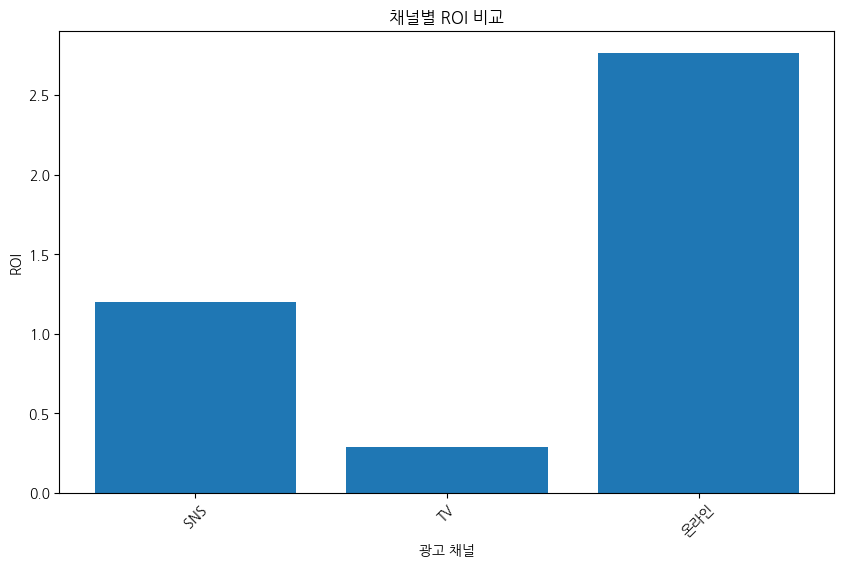

In [31]:
# ROI 바 차트 생성
plt.figure(figsize=(10, 6))
plt.bar(channel_performance['광고_채널'], channel_performance['ROI'])
plt.title('채널별 ROI 비교')
plt.xlabel('광고 채널')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

<ipython-input-32-9d5284fb6692>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=targeting_performance,
<ipython-input-32-9d5284fb6692>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=targeting_performance,


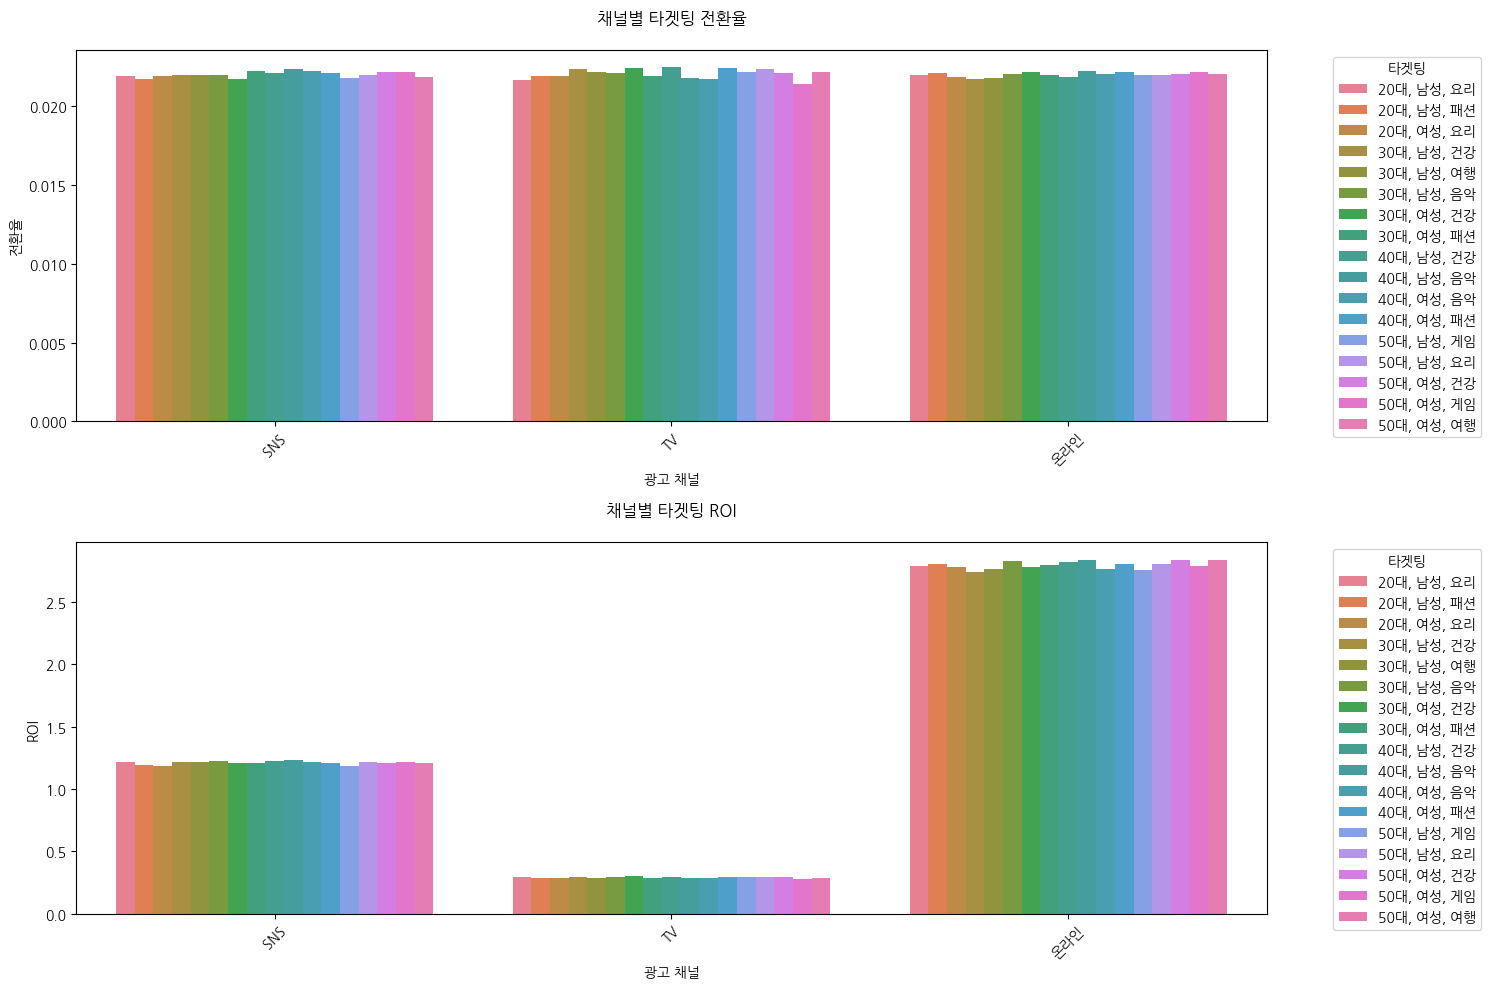


=== 타겟팅별 평균 성과 ===

전체 타겟팅 성과 요약:
                전환율             ROI        
               mean     std    mean     std
광고_타겟팅                                     
20대, 남성, 요리  0.0218  0.0002  1.4306  1.2589
20대, 남성, 패션  0.0219  0.0002  1.4280  1.2727
20대, 여성, 요리  0.0219  0.0001  1.4189  1.2605
30대, 남성, 건강  0.0220  0.0003  1.4160  1.2328
30대, 남성, 여행  0.0220  0.0002  1.4210  1.2493
30대, 남성, 음악  0.0220  0.0000  1.4484  1.2820
30대, 여성, 건강  0.0221  0.0003  1.4273  1.2500
30대, 여성, 패션  0.0220  0.0002  1.4306  1.2640
40대, 남성, 건강  0.0221  0.0003  1.4454  1.2721
40대, 남성, 음악  0.0221  0.0003  1.4496  1.2869
40대, 여성, 음악  0.0220  0.0003  1.4206  1.2505
40대, 여성, 패션  0.0222  0.0002  1.4351  1.2671
50대, 남성, 게임  0.0220  0.0002  1.4109  1.2460
50대, 남성, 요리  0.0221  0.0002  1.4390  1.2641
50대, 여성, 건강  0.0221  0.0001  1.4445  1.2854
50대, 여성, 게임  0.0219  0.0004  1.4261  1.2652
50대, 여성, 여행  0.0220  0.0002  1.4425  1.2859

상위 5개 성과 타겟팅 (전환율 기준):
   광고_채널       광고_타겟팅       전환율       ROI
25    TV  40대, 남성, 

In [32]:
# ROI 계산 (매출액/광고_지출액)
df['ROI'] = df['매출액'] / df['광고_지출액']

# 타겟팅별 성과 분석
targeting_performance = df.groupby(['광고_채널', '광고_타겟팅']).agg({
    '전환율': 'mean',
    'ROI': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(15, 10))

# 1. 타겟팅별 전환율
plt.subplot(2, 1, 1)
sns.barplot(data=targeting_performance,
            x='광고_채널',
            y='전환율',
            hue='광고_타겟팅',
            ci=None)
plt.title('채널별 타겟팅 전환율', pad=20, fontsize=12)
plt.xlabel('광고 채널')
plt.ylabel('전환율')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='타겟팅')

# 2. 타겟팅별 ROI
plt.subplot(2, 1, 2)
sns.barplot(data=targeting_performance,
            x='광고_채널',
            y='ROI',
            hue='광고_타겟팅',
            ci=None)
plt.title('채널별 타겟팅 ROI', pad=20, fontsize=12)
plt.xlabel('광고 채널')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='타겟팅')

plt.tight_layout()
plt.show()

# 결과 출력
print("\n=== 타겟팅별 평균 성과 ===")
summary = targeting_performance.groupby('광고_타겟팅')[['전환율', 'ROI']].agg({
    '전환율': ['mean', 'std'],
    'ROI': ['mean', 'std']
}).round(4)

print("\n전체 타겟팅 성과 요약:")
print(summary)

print("\n상위 5개 성과 타겟팅 (전환율 기준):")
print(targeting_performance.sort_values('전환율', ascending=False).head())

print("\n상위 5개 성과 타겟팅 (ROI 기준):")
print(targeting_performance.sort_values('ROI', ascending=False).head())

### C. 광고 형식별 효과 분석

In [33]:
# 채널-광고형식 조합별 성과
format_performance = df.groupby(['광고_채널', '광고_형식']).agg({
    'CTR': 'mean',
    '전환율': 'mean',
    'ROI': 'mean'
}).reset_index()

KeyError: "Column(s) ['CTR'] do not exist"

In [ ]:


# 시각화
plt.figure(figsize=(20, 15))

# 1. 광고형식별 CTR
plt.subplot(2, 2, 1)
sns.barplot(data=format_performance,
            x='광고_채널',
            y='CTR',
            hue='광고_형식',
            ci=None)
plt.title('채널별 광고형식 CTR', pad=20, fontsize=12)
plt.xlabel('광고 채널')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='광고 형식')

# 2. 광고형식별 전환율
plt.subplot(2, 2, 2)
sns.barplot(data=format_performance,
            x='광고_채널',
            y='전환율',
            hue='광고_형식',
            ci=None)
plt.title('채널별 광고형식 전환율', pad=20, fontsize=12)
plt.xlabel('광고 채널')
plt.ylabel('전환율')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='광고 형식')

# 3. 광고형식별 ROI
plt.subplot(2, 2, 3)
sns.barplot(data=format_performance,
            x='광고_채널',
            y='ROI',
            hue='광고_형식',
            ci=None)
plt.title('채널별 광고형식 ROI', pad=20, fontsize=12)
plt.xlabel('광고 채널')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='광고 형식')

# 4. 성과 지표간 상관관계 (히트맵)
plt.subplot(2, 2, 4)
correlation = format_performance[['CTR', '전환율', 'ROI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('성과 지표간 상관관계', pad=20, fontsize=12)

plt.tight_layout()
plt.show()

# 결과 출력
print("\n=== 광고형식별 평균 성과 ===")
summary = format_performance.groupby('광고_형식')[['CTR', '전환율', 'ROI']].agg({
    'CTR': ['mean', 'std'],
    '전환율': ['mean', 'std'],
    'ROI': ['mean', 'std']
}).round(4)

print("\n전체 광고형식 성과 요약:")
print(summary)

print("\n상위 5개 성과 조합 (CTR 기준):")
print(format_performance.sort_values('CTR', ascending=False).head())

print("\n상위 5개 성과 조합 (전환율 기준):")
print(format_performance.sort_values('전환율', ascending=False).head())

print("\n상위 5개 성과 조합 (ROI 기준):")
print(format_performance.sort_values('ROI', ascending=False).head())

## 4.의사결정 프레임워크

### 1) CPC, CPM, ROI 지표 계산

In [40]:
# CPC(Cost Per Click) 계산
df['CPC'] = df['광고_지출액'] / df['광고_클릭_횟수']

# CPM(Cost Per Mille) 계산
df['CPM'] = (df['광고_지출액'] / df['광고_노출_횟수']) * 1000

# ROI 계산
df['ROI'] = df['매출액'] / df['광고_지출액']

### 2) 채널별 기본지표 집계

In [41]:
channel_metrics = df.groupby('광고_채널').agg({
    'ROI': 'mean',
    'CPC': 'mean',
    'CPM': 'mean',
    '전환율': 'mean',
    '광고_회상률': 'mean',
    '광고_태도_변화': 'mean'
}).reset_index()

# 결과 확인
print("채널별 기본 지표:")
print(channel_metrics.round(3))

채널별 기본 지표:
  광고_채널    ROI     CPC      CPM    전환율  광고_회상률  광고_태도_변화
0   SNS  1.210   2.341   70.044  0.022   0.216    -0.001
1    TV  0.293  10.105  100.030  0.022   0.216    -0.001
2   온라인  2.793   1.003   50.041  0.022   0.216     0.001


### 3) 효율성 점수 계산

In [42]:
# 표준화 함수 (높을수록 좋은 지표는 1, 낮을수록 좋은 지표는 -1을 곱함)
def standardize(series, direction=1):
    return direction * (series - series.mean()) / series.std()

# 효율성 지표 표준화
channel_metrics['ROI_std'] = standardize(channel_metrics['ROI'], 1)
channel_metrics['CPC_std'] = standardize(channel_metrics['CPC'], -1)
channel_metrics['CPM_std'] = standardize(channel_metrics['CPM'], -1)

# 효율성 점수 계산 (가중치 적용)
channel_metrics['효율성_점수'] = (
    channel_metrics['ROI_std'] * 0.5 +
    channel_metrics['CPC_std'] * 0.3 +
    channel_metrics['CPM_std'] * 0.2
)

print("채널별 효율성 점수:")
print(channel_metrics[['광고_채널', '효율성_점수']].round(3))

채널별 효율성 점수:
  광고_채널  효율성_점수
0   SNS   0.070
1    TV  -1.006
2   온라인   0.936


### 4) 효과성 점수 계산

In [43]:
# 효과성 지표 표준화
channel_metrics['전환율_std'] = standardize(channel_metrics['전환율'], 1)
channel_metrics['회상률_std'] = standardize(channel_metrics['광고_회상률'], 1)
channel_metrics['태도변화_std'] = standardize(channel_metrics['광고_태도_변화'], 1)

# 효과성 점수 계산 (가중치 적용)
channel_metrics['효과성_점수'] = (
    channel_metrics['전환율_std'] * 0.4 +
    channel_metrics['회상률_std'] * 0.3 +
    channel_metrics['태도변화_std'] * 0.3
)

print("채널별 효과성 점수:")
print(channel_metrics[['광고_채널', '효과성_점수']].round(3))

채널별 효과성 점수:
  광고_채널  효과성_점수
0   SNS  -0.329
1    TV  -0.023
2   온라인   0.352


### 5) 종합 점수 계산 및 시각화

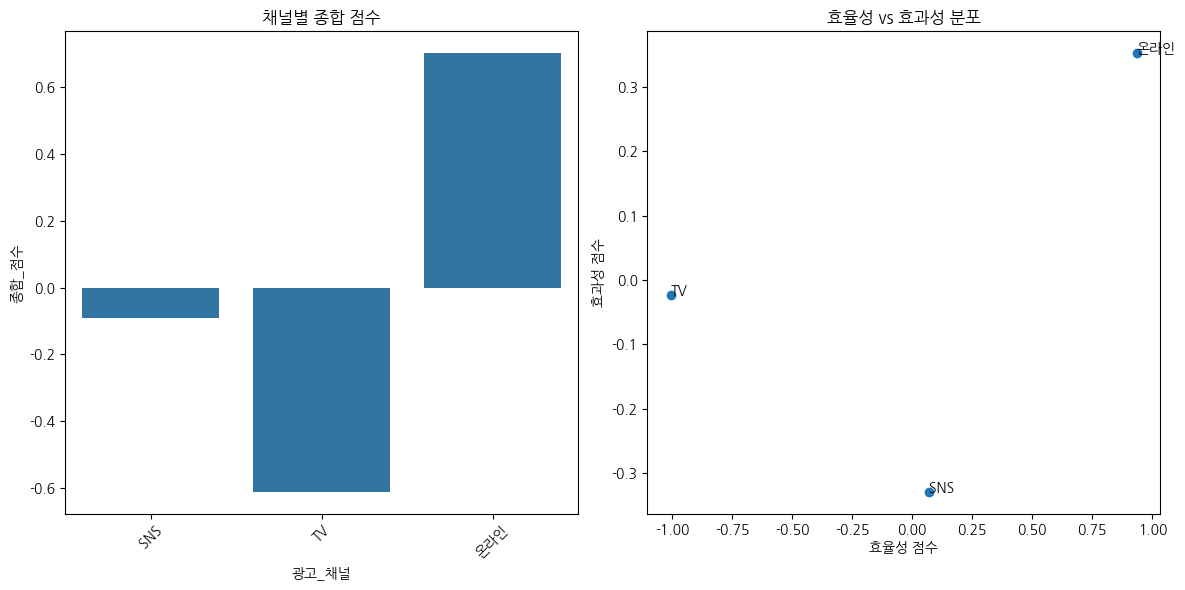


최종 채널 평가 결과:
  광고_채널  효율성_점수  효과성_점수  종합_점수
0   SNS   0.070  -0.329 -0.090
1    TV  -1.006  -0.023 -0.612
2   온라인   0.936   0.352  0.702


In [44]:
# 종합 점수 계산 (효율성 60%, 효과성 40%)
channel_metrics['종합_점수'] = (
    channel_metrics['효율성_점수'] * 0.6 +
    channel_metrics['효과성_점수'] * 0.4
)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 종합 점수 막대 그래프
plt.subplot(1, 2, 1)
sns.barplot(data=channel_metrics, x='광고_채널', y='종합_점수')
plt.title('채널별 종합 점수')
plt.xticks(rotation=45)

# 효율성vs효과성 산점도
plt.subplot(1, 2, 2)
plt.scatter(channel_metrics['효율성_점수'], channel_metrics['효과성_점수'])
for i, channel in enumerate(channel_metrics['광고_채널']):
    plt.annotate(channel,
                (channel_metrics['효율성_점수'].iloc[i],
                 channel_metrics['효과성_점수'].iloc[i]))
plt.xlabel('효율성 점수')
plt.ylabel('효과성 점수')
plt.title('효율성 vs 효과성 분포')

plt.tight_layout()
plt.show()

print("\n최종 채널 평가 결과:")
print(channel_metrics[['광고_채널', '효율성_점수', '효과성_점수', '종합_점수']].round(3))

### 6) 시계열 추세 분석

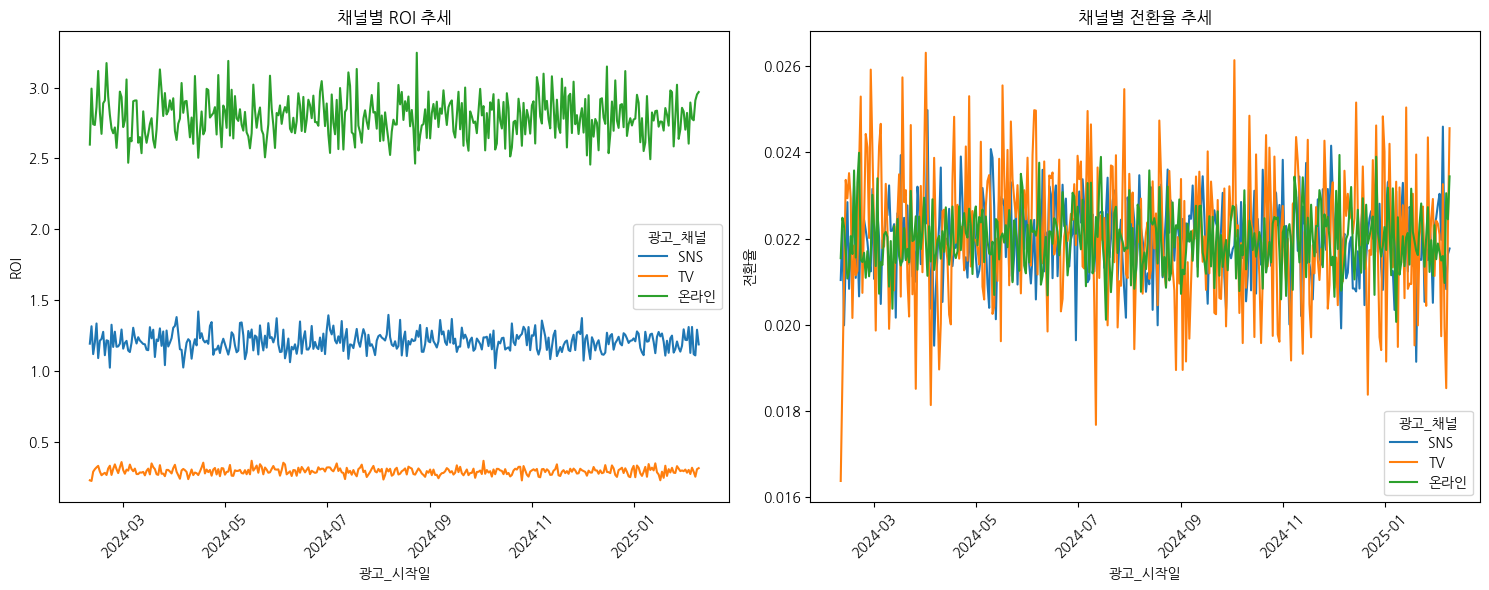

In [45]:
# 일자별 채널 성과 추세
df['광고_시작일'] = pd.to_datetime(df['광고_시작일'])
time_trend = df.groupby(['광고_시작일', '광고_채널']).agg({
    'ROI': 'mean',
    '전환율': 'mean'
}).reset_index()

# 추세 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=time_trend, x='광고_시작일', y='ROI', hue='광고_채널')
plt.title('채널별 ROI 추세')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=time_trend, x='광고_시작일', y='전환율', hue='광고_채널')
plt.title('채널별 전환율 추세')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5.액션 플랜
https://app.napkin.ai/page/CgoiCHByb2Qtb25lEiwKBFBhZ2UaJGVkYWY5ODVjLTVmYmYtNDYwNy1iNWEwLTUyNzFkODFhMDg5OA?s=1